Seran Gemechu

CMPE 252 - AI & DE

Spring '25

# **Network Intrusion Detection System using ANN**



#**NSL-KDD (UCI 1998-99)**

The KDD Cup 1999 dataset was created by processing the tcp-dump portion of the 1998 DARPA dataset, which nonetheless suffers from the same issues. This dataset includes more than twenty attacks such as neptune-dos, pod-dos, smurf-dos, buffer-overflow, rootkit, satan, teardrop, to name a few [5]. The network traffic records of normal and attack traffics. They are merged together in a simulated environment. This dataset has a large number of redundant records and is studded by data corruptions that led to skewed testing results [6]. NSL-KDD was created using KDD dataset [6] to address some of the KDD's shortcomings [3].

# Improvements to the KDD'99 data set

The NSL-KDD data set has the following advantages over the original KDD data set:

    It does not include redundant records in the train set, so the classifiers will not be biased towards more frequent records.

    There is no duplicate records in the proposed test sets; therefore, the performance of the learners are not biased by the methods which have better detection rates on the frequent records.

    The number of selected records from each difficultylevel group is inversely proportional to the percentage of records in the original KDD data set. As a result, the classification rates of distinct machine learning methods vary in a wider range, which makes it more efficient to have an accurate evaluation of different learning techniques.

    The number of records in the train and test sets are reasonable, which makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research works will be consistent and comparable.



# Overview of the IDS Architecture
The Intrusion Detection System (IDS) Architecture consists of six major steps:

    1️⃣ Data Collection & Loading → Import NSL-KDD dataset from Hugging Face
    2️⃣ Data Preprocessing → Encode categorical features, normalize numerical values
    3️⃣ Define Neural Network Model → Construct an MLP (ANN) model
    4️⃣ Train the Model → Perform forward propagation, loss computation, and backpropagation
    5️⃣ Evaluate Model → Compute accuracy on test data
    6️⃣ Make Predictions → Use the trained model to detect intrusions in new network traffic

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pip install datasets
from datasets import load_dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whi

In [4]:
# =====================
# @title Load Dataset from Hugging Face
# =====================
dataset = load_dataset("Mireu-Lab/NSL-KDD")

README.md:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/22.5M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/5.14M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/151165 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/34394 [00:00<?, ? examples/s]

In [5]:
# Convert to pandas DataFrame
train_data = pd.DataFrame(dataset["train"])
test_data = pd.DataFrame(dataset["test"])

In [6]:
train_data.head()
# test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [10]:
# train_data.columns()
# Print the columns and their dtypes
print(test_data.dtypes)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [12]:
# ==========================
# @title 📌 Step 3: Data Preprocessing
      # protocol_type                   object
      # service                         object
      # flag                            object
# ==========================

# Convert categorical features into numerical (One-Hot Encoding)
categorical_cols = ["protocol_type", "service", "flag"]

train_data = pd.get_dummies(train_data, columns=categorical_cols)
test_data = pd.get_dummies(test_data, columns=categorical_cols)

In [32]:
# Ensure train and test sets have the same columns
train_cols = train_data.columns
test_data = test_data.reindex(columns=train_cols, fill_value=0)

In [33]:
# @title Encode attack type [0 = Normal, 1 = Anomaly]
train_data["attack_binary"] = train_data["class"].apply(lambda x: 0 if x == "normal" else 1)
test_data["attack_binary"] = test_data["class"].apply(lambda x: 0 if x == "normal" else 1)

In [34]:
train_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_binary
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,0
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,0
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,1
3,0,232,8153,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,0
4,0,199,420,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,0


In [35]:
# Drop the original "class" column (not needed for training)
X_train = train_data.drop(columns=["class", "attack_binary"])
y_train = train_data["attack_binary"]

X_test = test_data.drop(columns=["class", "attack_binary"])
y_test = test_data["attack_binary"]

In [42]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# @title Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

# Print dataset shape for verification
print(f"Training Data Shape: {X_train_tensor.shape}")
print(f"Testing Data Shape: {X_test_tensor.shape}")


Training Data Shape: torch.Size([151165, 122])
Testing Data Shape: torch.Size([34394, 122])


In [49]:
X_train_tensor.H

tensor([[-0.1108, -0.1108, -0.1108,  ..., -0.1108, -0.1108, -0.1108],
        [-0.0076, -0.0077, -0.0077,  ..., -0.0073, -0.0077, -0.0077],
        [-0.0046, -0.0046, -0.0046,  ..., -0.0045, -0.0046, -0.0046],
        ...,
        [-0.0206, -0.0206, -0.0206,  ..., -0.0206, -0.0206, -0.0206],
        [ 0.8253,  0.8253, -1.2117,  ...,  0.8253, -1.2117,  0.8253],
        [-0.0456, -0.0456, -0.0456,  ..., -0.0456, -0.0456, -0.0456]])

In [50]:
input_size = X_train.shape[1]  # Number of features
print(input_size)

122


In [51]:
# ==========================
# @title 📌 Step 4: ANN Model
# ==========================

class IDS_ANN(nn.Module):
    def __init__(self, input_size):
        super(IDS_ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))  # Binary classification output
        return x

# Initialize model
input_size = X_train.shape[1]  # Number of features
model = IDS_ANN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [53]:

# ==========================
# @title 📌 Step 5: Train the ANN IDS Model & Plot Loss Curve
# ==========================
epochs = 10
batch_size = 64
loss_history = []  # Store loss values

for epoch in range(epochs):
    epoch_loss = 0
    num_batches = len(X_train_tensor) // batch_size
    print(num_batches)

    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / num_batches
    loss_history.append(avg_epoch_loss)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {avg_epoch_loss:.4f}")



2361
Epoch [0/10], Loss: 0.0461
2361
2361
2361
2361
2361
2361
2361
2361
2361


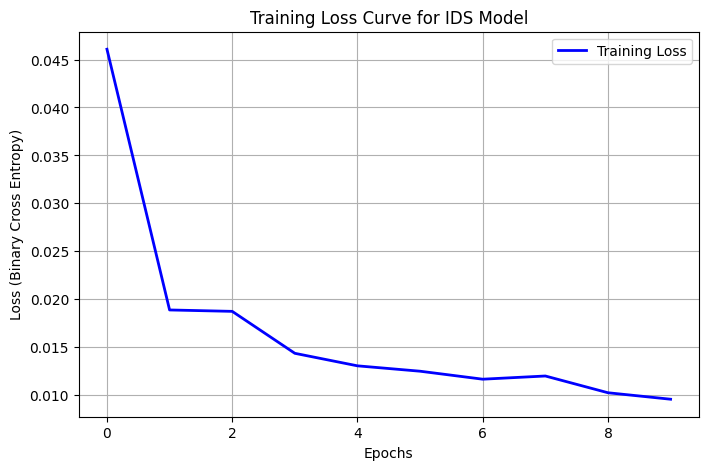

In [54]:
# Plot the training loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_history, label="Training Loss", color="blue", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss (Binary Cross Entropy)")
plt.title("Training Loss Curve for IDS Model")
plt.legend()
plt.grid(True)
plt.show()

In [55]:

# ==========================
# @title 📌 Step 6: Evaluate Model Performance
# ==========================
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = (y_pred >= 0.5).float()

# Compute accuracy
accuracy = (y_pred.eq(y_test_tensor).sum() / y_test_tensor.shape[0]).item()
print(f"Test Accuracy: {accuracy * 100:.2f}%")




Test Accuracy: 73.07%


In [56]:
# ==========================
# 📌 Step 7: Make Predictions on New Network Traffic
# ==========================
# Example new network traffic (normalized input)
new_sample = torch.tensor([X_test[0]], dtype=torch.float32)

# Predict whether traffic is normal or an attack
prediction = model(new_sample).item()
print(f"Prediction: {'Attack' if prediction >= 0.5 else 'Normal Traffic'}")

Prediction: Normal Traffic


<ipython-input-56-5abe63d5df4f>:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  new_sample = torch.tensor([X_test[0]], dtype=torch.float32)
